In [1]:
import yfinance as yf
import pandas as pd
import datetime

C:\Users\adeye\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

C:\Users\adeye\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\adeye\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
# Download stock data for Microsoft (ticker symbol: MSFT) from Yahoo Finance
msft = pd.read_csv("C:/Users/adeye/Downloads/MSFT.csv")

In [4]:
# Download gold data for gold (ticker symbol: GC=F) from Yahoo Finance
gold = pd.read_csv("C:/Users/adeye/Downloads/Gold.csv")

In [5]:
inflation = pd.read_csv("C:/Users/adeye/OneDrive/Desktop/BLS Inflation data time series.csv")

In [6]:
unemployment = pd.read_csv("C:/Users/adeye/OneDrive//Desktop/BLS Unemployment rate time series.csv")

In [7]:
merged_df = gold.copy()
merged_df = pd.merge(merged_df, inflation[['Date', 'Inflation']], on='Date', how='left')
merged_df = pd.merge(merged_df, msft[['Date', 'Adj Close']], on='Date', how='left')
merged_df = pd.merge(merged_df, unemployment[['Date', 'Unemployment']], on='Date', how='left')
time_series_df = merged_df


In [8]:
print(time_series_df)

           Date  Close/Last    Volume    Open    High     Low  Inflation  \
0     3/24/2023      1983.8  276299.0  1996.1  2006.5  1977.7        NaN   
1     3/23/2023      1995.9  257040.0  1974.0  2006.1  1967.3        NaN   
2     3/22/2023      1949.6  240155.0  1943.5  1982.3  1936.5        NaN   
3     3/21/2023      1941.1  242914.0  1983.1  1988.7  1938.6        NaN   
4     3/20/2023      1999.7   66038.0  2008.6  2031.7  1987.0        NaN   
...         ...         ...       ...     ...     ...     ...        ...   
2538   4/1/2013      1600.9   57638.0  1598.1  1601.6  1595.2       -0.2   
2539  3/29/2013      1595.7       NaN  1595.7  1595.7  1595.7       -0.3   
2540  3/28/2013      1595.7  105714.0  1605.6  1608.3  1594.3       -0.3   
2541  3/27/2013      1607.2  152626.0  1601.0  1609.0  1591.9       -0.3   
2542  3/26/2013      1597.3  125380.0  1606.5  1606.9  1595.2       -0.3   

      Adj Close  Unemployment  
0        280.57           NaN  
1        277.66        

In [9]:
time_series_df.head(30)

,Date,Close/Last,Volume,Open,High,Low,Inflation,Adj Close,Unemployment
0,3/24/2023,1983.8,276299.0,1996.1,2006.5,1977.7,NaN,280.57,NaN
1,3/23/2023,1995.9,257040.0,1974.0,2006.1,1967.3,NaN,277.66,NaN
2,3/22/2023,1949.6,240155.0,1943.5,1982.3,1936.5,NaN,272.29,NaN
3,3/21/2023,1941.1,242914.0,1983.1,1988.7,1938.6,NaN,273.78,NaN
4,3/20/2023,1999.7,66038.0,2008.6,2031.7,1987.0,NaN,272.23,NaN
5,3/17/2023,1990.2,63433.0,1942.7,2010.4,1939.1,NaN,279.43,NaN
6,3/16/2023,1923.0,242983.0,1922.8,1938.0,1911.5,NaN,276.20,NaN
7,3/15/2023,1931.3,376775.0,1908.2,1942.5,1889.5,NaN,265.44,NaN
8,3/14/2023,1910.9,254442.0,1919.4,1919.4,1899.8,NaN,260.79,NaN
9,3/13/2023,1916.5,426262.0,1877.1,1919.5,1875.7,NaN,253.92,NaN


In [10]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2542
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2543 non-null   object 
 1   Close/Last    2543 non-null   float64
 2   Volume        2509 non-null   float64
 3   Open          2543 non-null   float64
 4   High          2543 non-null   float64
 5   Low           2543 non-null   float64
 6   Inflation     2525 non-null   float64
 7   Adj Close     2518 non-null   float64
 8   Unemployment  2525 non-null   float64
dtypes: float64(8), object(1)
memory usage: 198.7+ KB


In [11]:
time_series_df.describe()

,Close/Last,Volume,Open,High,Low,Inflation,Adj Close,Unemployment
count,2543.000000,2509.000000,2543.000000,2543.000000,2543.000000,2525.000000,2518.000000,2525.000000
mean,1444.096382,183547.520526,1444.140149,1453.782816,1434.241054,0.207287,122.220933,5.206297
std,264.464487,97791.998654,264.652815,266.697621,262.007421,0.267735,91.702277,1.785810
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,-0.800000,23.350000,3.400000
25%,1243.400000,122559.000000,1242.900000,1250.900000,1235.150000,0.100000,42.192500,3.900000
50%,1318.400000,170994.000000,1318.900000,1326.000000,1310.800000,0.200000,88.290000,4.900000
75%,1731.700000,233106.000000,1732.950000,1743.750000,1721.150000,0.300000,206.517500,6.100000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000,1.200000,339.080000,14.700000


In [12]:
time_series_df.isnull().sum()

Date             0
Close/Last       0
Volume          34
Open             0
High             0
Low              0
Inflation       18
Adj Close       25
Unemployment    18
dtype: int64

In [13]:
#time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

In [14]:
from sklearn.impute import KNNImputer

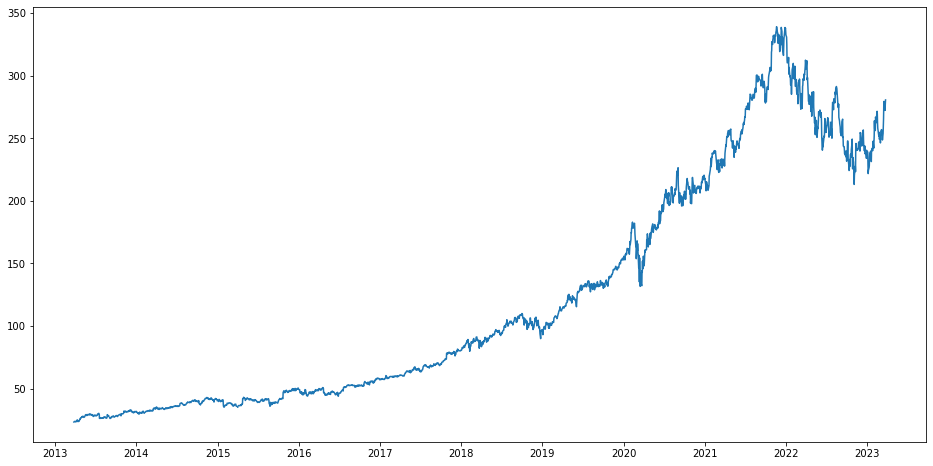

In [15]:
time_series_df["Date"]=pd.to_datetime(time_series_df.Date,format="%m/%d/%Y")
time_series_df.index=time_series_df['Date']
plt.figure(figsize=(16,8))
plt.plot(time_series_df["Adj Close"],label='Close Price history')

In [16]:
n_neighbors = 5

# create a k-NN imputer object
imputer = KNNImputer(n_neighbors=n_neighbors)

# loop over each column in the DataFrame
for column in time_series_df.columns:
    # get the column data as a numpy array
    column_data = time_series_df[column].values.reshape(-1, 1)
    
    # use k-NN imputation to fill in missing values
    imputer.fit(column_data)
    column_data_imputed = imputer.transform(column_data)
    
    # replace the original column with the imputed column
    time_series_df[column] = column_data_imputed.flatten()

print(time_series_df)

                    Date  Close/Last         Volume    Open    High     Low  \
Date                                                                          
2023-03-24  1.679616e+18      1983.8  276299.000000  1996.1  2006.5  1977.7   
2023-03-23  1.679530e+18      1995.9  257040.000000  1974.0  2006.1  1967.3   
2023-03-22  1.679443e+18      1949.6  240155.000000  1943.5  1982.3  1936.5   
2023-03-21  1.679357e+18      1941.1  242914.000000  1983.1  1988.7  1938.6   
2023-03-20  1.679270e+18      1999.7   66038.000000  2008.6  2031.7  1987.0   
...                  ...         ...            ...     ...     ...     ...   
2013-04-01  1.364774e+18      1600.9   57638.000000  1598.1  1601.6  1595.2   
2013-03-29  1.364515e+18      1595.7  183547.520526  1595.7  1595.7  1595.7   
2013-03-28  1.364429e+18      1595.7  105714.000000  1605.6  1608.3  1594.3   
2013-03-27  1.364342e+18      1607.2  152626.000000  1601.0  1609.0  1591.9   
2013-03-26  1.364256e+18      1597.3  125380.000000 

In [17]:
time_series_df.head()

,Date,Close/Last,Volume,Open,High,Low,Inflation,Adj Close,Unemployment
Date,,,,,,,,,
2023-03-24,1.679616e+18,1983.8,276299.0,1996.1,2006.5,1977.7,0.207287,280.57,5.206297
2023-03-23,1.679530e+18,1995.9,257040.0,1974.0,2006.1,1967.3,0.207287,277.66,5.206297
2023-03-22,1.679443e+18,1949.6,240155.0,1943.5,1982.3,1936.5,0.207287,272.29,5.206297
2023-03-21,1.679357e+18,1941.1,242914.0,1983.1,1988.7,1938.6,0.207287,273.78,5.206297
2023-03-20,1.679270e+18,1999.7,66038.0,2008.6,2031.7,1987.0,0.207287,272.23,5.206297


In [18]:
time_series_df.isnull().sum()

Date            0
Close/Last      0
Volume          0
Open            0
High            0
Low             0
Inflation       0
Adj Close       0
Unemployment    0
dtype: int64

In [19]:
time_series_df.tail()

,Date,Close/Last,Volume,Open,High,Low,Inflation,Adj Close,Unemployment
Date,,,,,,,,,
2013-04-01,1.364774e+18,1600.9,57638.000000,1598.1,1601.6,1595.2,-0.2,23.730000,7.6
2013-03-29,1.364515e+18,1595.7,183547.520526,1595.7,1595.7,1595.7,-0.3,122.220933,7.5
2013-03-28,1.364429e+18,1595.7,105714.000000,1605.6,1608.3,1594.3,-0.3,23.730000,7.5
2013-03-27,1.364342e+18,1607.2,152626.000000,1601.0,1609.0,1591.9,-0.3,23.530000,7.5
2013-03-26,1.364256e+18,1597.3,125380.000000,1606.5,1606.9,1595.2,-0.3,23.350000,7.5


In [20]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543 entries, 2023-03-24 to 2013-03-26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2543 non-null   float64
 1   Close/Last    2543 non-null   float64
 2   Volume        2543 non-null   float64
 3   Open          2543 non-null   float64
 4   High          2543 non-null   float64
 5   Low           2543 non-null   float64
 6   Inflation     2543 non-null   float64
 7   Adj Close     2543 non-null   float64
 8   Unemployment  2543 non-null   float64
dtypes: float64(9)
memory usage: 198.7 KB


In [21]:
Cleansed_df = time_series_df.drop(['Date', 'Volume', 'Open', 'High', 'Low', 'Unemployment'], axis=1)

In [22]:
Cleansed_df.head()

,Close/Last,Inflation,Adj Close
Date,,,
2023-03-24,1983.8,0.207287,280.57
2023-03-23,1995.9,0.207287,277.66
2023-03-22,1949.6,0.207287,272.29
2023-03-21,1941.1,0.207287,273.78
2023-03-20,1999.7,0.207287,272.23


In [23]:
print(Cleansed_df)

            Close/Last  Inflation   Adj Close
Date                                         
2023-03-24      1983.8   0.207287  280.570000
2023-03-23      1995.9   0.207287  277.660000
2023-03-22      1949.6   0.207287  272.290000
2023-03-21      1941.1   0.207287  273.780000
2023-03-20      1999.7   0.207287  272.230000
...                ...        ...         ...
2013-04-01      1600.9  -0.200000   23.730000
2013-03-29      1595.7  -0.300000  122.220933
2013-03-28      1595.7  -0.300000   23.730000
2013-03-27      1607.2  -0.300000   23.530000
2013-03-26      1597.3  -0.300000   23.350000

[2543 rows x 3 columns]


In [24]:
Cleansed_df.head()

,Close/Last,Inflation,Adj Close
Date,,,
2023-03-24,1983.8,0.207287,280.57
2023-03-23,1995.9,0.207287,277.66
2023-03-22,1949.6,0.207287,272.29
2023-03-21,1941.1,0.207287,273.78
2023-03-20,1999.7,0.207287,272.23


In [25]:
Cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2543 entries, 2023-03-24 to 2013-03-26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2543 non-null   float64
 1   Inflation   2543 non-null   float64
 2   Adj Close   2543 non-null   float64
dtypes: float64(3)
memory usage: 79.5 KB


In [26]:
Cleansed_df.isnull().sum()

Close/Last    0
Inflation     0
Adj Close     0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [28]:
Cleansed_df.shape

(2543, 3)

We have 3 feature columns and one target column. The target column is 'Adj Close' and there are 2543 rows to the data frame.¶

EDA for the data set

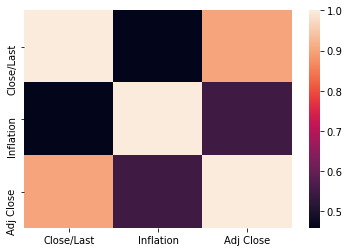

In [29]:
_ = sns.heatmap(Cleansed_df.corr())

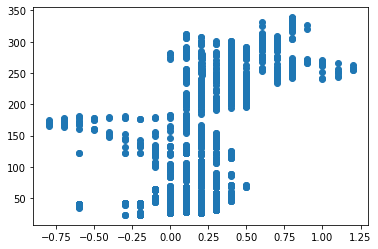

In [30]:
plt.scatter(Cleansed_df['Inflation'],Cleansed_df['Adj Close'])

In [31]:
# Import the MinMaxScaler class from the scikit-learn library.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMaxScaler object with a feature range of (0, 1) and use it to scale the data.
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Cleansed_df)

In [32]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

Create a function to create the input and output variables for the LSTM model. The function takes a dataset and a number of time steps as inputs and returns two arrays, one containing the input data and one containing the output data.

In [33]:
# Split the data into input (X) and output (y) variables
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:i+time_steps, :])
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y), dataset.shape[1]

Call the create_dataset function with the training and test datasets and the specified number of time steps to create the input and output variables for the LSTM model.

In [34]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [35]:
# Create the input and output variables for the LSTM model
time_steps = 60  # number of time steps to look back
X_train, y_train, n_features = create_dataset(train_data, time_steps)
X_test, y_test, _ = create_dataset(test_data, time_steps)

In [36]:
# Create a dummy array with the same shape as X_train, but with only one row
dummy_array = np.zeros((1, X_train.shape[1], n_features))

Reshape the input data to be in the format expected by the LSTM model. The reshape operation is done on both the training and test input variables.

In [37]:
# Fit the scaler on the concatenated data
scaler.fit(np.concatenate((X_train, dummy_array), axis=0).reshape(-1, n_features))

MinMaxScaler()

In [38]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

In [39]:
import tensorflow as tf

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/50
56/56 [==============================] - 6s 71ms/step - loss: 0.0342 - val_loss: 0.0072
Epoch 2/50
56/56 [==============================] - 3s 47ms/step - loss: 0.0152 - val_loss: 0.0046
Epoch 3/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0115 - val_loss: 0.0033
Epoch 4/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0113 - val_loss: 0.0029
Epoch 5/50
56/56 [==============================] - 3s 45ms/step - loss: 0.0098 - val_loss: 0.0032
Epoch 6/50
56/56 [==============================] - 3s 45ms/step - loss: 0.0100 - val_loss: 0.0028
Epoch 7/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0087 - val_loss: 0.0027
Epoch 8/50
56/56 [==============================] - 3s 55ms/step - loss: 0.0086 - val_loss: 0.0027
Epoch 9/50
56/56 [==============================] - 3s 52ms/step - loss: 0.0073 - val_loss: 0.0019
Epoch 10/50
56/56 [==============================] - 3s 52ms/step - loss: 0.0068 - val_loss: 0.0017
Epoch 11/

In [40]:
# Make a prediction on the test set
y_pred = model.predict(X_test)

# Reshape y_pred to (n_samples, 1) and invert the scaling of the predicted values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Invert the scaling of the actual values
y_test = scaler.inverse_transform([y_test])[0]

# Calculate the RMSE score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

15/15 [==============================] - 1s 15ms/step


ValueError: non-broadcastable output operand with shape (449,1) doesn't match the broadcast shape (449,3)

In [ ]:
# Plot the actual values
plt.plot(y_test[0], label="Actual")

# Plot the predicted values
plt.plot(y_pred[:,0], label="Predicted")

# Set plot title and axis labels
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)